## Compare Fat Globule Phenotypes

**Gregory Way, 2019**

In [1]:
import os
import pandas as pd
import numpy as np
from scipy import stats

import plotnine as gg

In [2]:
def compare_groups(df, ffa, day, features):
    # Perform an independent t-test for given combination of ffa and day
    day = str(day)
    ffa = int(ffa)
    comp_df = (
        df
        .query("Metadata_FFA == @ffa")
        .query("Metadata_diff_day == @day")
        .reset_index(drop=True)
    )
    a_df = comp_df.query("Metadata_category == 1").loc[:, cp_features].reset_index(drop=True)
    b_df = comp_df.query("Metadata_category == 0").loc[:, cp_features].reset_index(drop=True)
    
    t_stat, p_val = stats.ttest_ind(a=a_df, b=b_df)
    
    t_result_df = pd.DataFrame(t_stat).transpose()
    t_result_df.columns = cp_features
    t_result_df = t_result_df.melt().rename({"value": "t_stat",
                                             "variable": "cp_feature"}, axis="columns")

    p_result_df = pd.DataFrame(p_val).transpose()
    p_result_df.columns = cp_features
    p_result_df = p_result_df.melt().rename({"value": "p_val",
                                             "variable": "cp_feature"}, axis="columns")


    result_df = (
        t_result_df
        .merge(p_result_df, on="cp_feature")
        .assign(FFA=ffa, diff_day=day)
        .sort_values(by="cp_feature")
        .reset_index(drop=True)
    )

    return result_df

In [3]:
# Load labels
file = os.path.join("data", "category_labels.csv")
label_df = pd.read_csv(file)
label_df.columns = ["Metadata_{}".format(x) for x in label_df.columns]

label_df

,Metadata_T2D_bin,Metadata_quantile_T2D,Metadata_percentile_T2D,Metadata_rank_T2D,Metadata_percentile_HOMA-IR,Metadata_rank_HOMA-IR,Metadata_IID,Metadata_category
0,0,NaN,87.50,161.0,47.83,88,m164,1
1,1,NaN,81.52,150.0,80.43,148,m246,1
2,1,NaN,23.91,44.0,39.67,73,m252,0
3,0,0.0,38.32,70.5,93.48,172,m266,1
4,1,0.0,57.61,106.0,8.70,16,m270,0
5,1,NaN,92.39,170.0,79.35,146,m272,1
6,0,NaN,93.48,172.0,16.85,31,m276,0


In [4]:
# Load profiles
file = os.path.join("data", "batch1_batch3_combined_normalized_variable_selected.tsv")
df = pd.read_csv(file, sep='\t').drop(["Metadata_Plate",
                                       "Metadata_Assay_Plate_Barcode",
                                       "Metadata_well_position"], axis="columns")

print(df.shape)
df.head()

(850, 686)


,Metadata_Well,Metadata_Plate_Map_Name,Metadata_cell_line,Metadata_patient,Metadata_FFA,Metadata_diff_day,Metadata_Batch,Cells_RadialDistribution_RadialCV_ER_4of4,Cytoplasm_Texture_Correlation_DNA_5_03,Nuclei_AreaShape_Zernike_9_9,...,Cells_Texture_Correlation_ER_20_00,Cytoplasm_RadialDistribution_RadialCV_AGP_2of4,Cytoplasm_Correlation_Costes_AGP_Mito,Cytoplasm_Texture_AngularSecondMoment_ER_20_01,Cytoplasm_Texture_InfoMeas2_AGP_10_01,Nuclei_Correlation_K_Mito_AGP,Cells_RadialDistribution_MeanFrac_AGP_1of4,Nuclei_RadialDistribution_MeanFrac_AGP_4of4,Cells_RadialDistribution_MeanFrac_ER_3of4,Cytoplasm_Texture_InfoMeas1_DNA_5_03
0,B02,BR00101080,vc,PAC_261,0,3,batch_one,-0.114910,-0.823503,-0.863251,...,2.444135,-0.310373,-0.845946,2.459777,-1.253708,-1.104008,0.217482,-0.157992,0.390266,0.861075
1,B03,BR00101080,sc,PAC_246,0,3,batch_one,-2.372040,-0.102417,-1.798388,...,-0.527287,-0.737790,0.599342,-0.167903,-0.085912,-0.182068,-1.406805,1.254943,-1.241692,0.590825
2,B04,BR00101080,vc,PAC_246,0,3,batch_one,0.210999,-0.572233,-0.189149,...,-0.017209,-1.700715,-2.094237,0.746699,-0.868032,-0.798334,0.460770,-0.401296,0.795924,0.688132
3,B05,BR00101080,sc,PAC_266,0,3,batch_one,-0.312201,-0.895292,-1.547571,...,0.138464,-0.275171,0.649027,0.802356,0.013664,-0.396228,0.008735,-0.044888,0.188744,0.980844
4,B06,BR00101080,vc,PAC_266,0,3,batch_one,-0.678585,-0.371752,-0.449782,...,1.489157,0.280413,-0.713035,1.981090,-1.016912,0.412504,-0.853789,0.785913,-0.294847,0.772895


In [5]:
aggregate_cols = ["Metadata_Plate_Map_Name", "Metadata_cell_line", "Metadata_patient",
                  "Metadata_FFA", "Metadata_diff_day", "Metadata_Batch"]

agg_df = df.groupby(aggregate_cols).mean().reset_index()
agg_df.loc[:, "Metadata_patient"] = ["m{}".format(x.strip("PAC_")) for x in agg_df.Metadata_patient]

# Merge labels
group_df = label_df.merge(agg_df, left_on="Metadata_IID", right_on="Metadata_patient", how="inner")

print(group_df.shape)
group_df.head()

(172, 693)


,Metadata_T2D_bin,Metadata_quantile_T2D,Metadata_percentile_T2D,Metadata_rank_T2D,Metadata_percentile_HOMA-IR,Metadata_rank_HOMA-IR,Metadata_IID,Metadata_category,Metadata_Plate_Map_Name,Metadata_cell_line,...,Cells_Texture_Correlation_ER_20_00,Cytoplasm_RadialDistribution_RadialCV_AGP_2of4,Cytoplasm_Correlation_Costes_AGP_Mito,Cytoplasm_Texture_AngularSecondMoment_ER_20_01,Cytoplasm_Texture_InfoMeas2_AGP_10_01,Nuclei_Correlation_K_Mito_AGP,Cells_RadialDistribution_MeanFrac_AGP_1of4,Nuclei_RadialDistribution_MeanFrac_AGP_4of4,Cells_RadialDistribution_MeanFrac_ER_3of4,Cytoplasm_Texture_InfoMeas1_DNA_5_03
0,0,NaN,87.5,161.0,47.83,88,m164,1,BR00101075,sc,...,0.065057,0.004909,-0.000853,-0.547134,-0.480269,-0.712048,-0.237917,-1.622929,0.770427,0.832365
1,0,NaN,87.5,161.0,47.83,88,m164,1,BR00101075,sc,...,-0.063018,0.366154,0.592635,-0.651238,-0.373063,-1.095629,-0.188966,-1.776913,0.353473,0.891443
2,0,NaN,87.5,161.0,47.83,88,m164,1,BR00101075,vc,...,0.078962,-1.093340,-2.649662,0.881805,-0.961734,0.989506,-0.402171,0.513049,-0.547848,0.650202
3,0,NaN,87.5,161.0,47.83,88,m164,1,BR00101075,vc,...,-0.349343,0.391392,0.440502,-0.334023,0.821632,0.135664,0.596942,0.335212,-0.124232,-0.224542
4,0,NaN,87.5,161.0,47.83,88,m164,1,BR00101076,sc,...,0.654163,-0.094681,-0.188862,-0.575739,-0.701357,-1.249981,-0.330143,-1.100799,0.813418,0.934178


In [6]:
bodipy_features = [x for x in group_df.columns if "BODIPY" in x]

print(len(bodipy_features))
bodipy_features

37


['Cells_Mean_SmallBODIPYObjects_Granularity_12_ER',
 'Cells_Mean_SmallBODIPYObjects_Correlation_Costes_Mito_ER',
 'Cells_Mean_SmallBODIPYObjects_AreaShape_Orientation',
 'Cells_Mean_SmallBODIPYObjects_Correlation_Correlation_Mito_AGP',
 'Cells_Mean_SmallBODIPYObjects_Correlation_K_Mito_ER',
 'Cells_Mean_SmallBODIPYObjects_Correlation_K_DNA_AGP',
 'Cells_Mean_SmallBODIPYObjects_Correlation_K_ER_Mito',
 'Cells_Mean_SmallBODIPYObjects_Granularity_2_ER',
 'Cells_Mean_SmallBODIPYObjects_Correlation_K_DNA_ER',
 'Cells_Mean_SmallBODIPYObjects_Correlation_Costes_AGP_ER',
 'Cells_Mean_SmallBODIPYObjects_Granularity_13_ER',
 'Cells_Mean_SmallBODIPYObjects_Intensity_MADIntensity_ER',
 'Cells_Mean_SmallBODIPYObjects_Granularity_11_ER',
 'Cells_Mean_SmallBODIPYObjects_Granularity_3_ER',
 'Cells_Mean_SmallBODIPYObjects_Correlation_Correlation_DNA_AGP',
 'Cells_Mean_SmallBODIPYObjects_Correlation_K_Mito_AGP',
 'Cells_Mean_SmallBODIPYObjects_Granularity_4_ER',
 'Cells_Mean_SmallBODIPYObjects_Granulari

In [7]:
group_df.Metadata_cell_line.value_counts()

vc    86
sc    86
Name: Metadata_cell_line, dtype: int64

In [8]:
group_df.Metadata_cell_line.value_counts()

vc    86
sc    86
Name: Metadata_cell_line, dtype: int64

In [9]:
# Split visceral and subcutaneous
vc_df = group_df.query("Metadata_cell_line == 'vc'")
sc_df = group_df.query("Metadata_cell_line == 'sc'")

In [10]:
vc_df.Metadata_diff_day.value_counts()

3         14
14        14
0         14
8          8
15         6
15+iso     6
10         6
7          6
2          6
1          6
Name: Metadata_diff_day, dtype: int64

## Calculate all comparisons

In [11]:
cp_features = [x for x in vc_df.columns if not x.startswith("Metadata_")]

In [12]:
all_results = []
for ffa in [0, 1]:
    for day in [0, 3, 14]:
        result_df = compare_groups(df=vc_df, ffa=ffa, day=day, features=cp_features)
        all_results.append(result_df)

In [13]:
all_results_df = pd.concat(all_results).sort_values(by="cp_feature").reset_index(drop=True)
all_results_df = all_results_df.assign(neg_log_10_p=-1 * np.log10(all_results_df.p_val))

print(all_results_df.shape)
all_results_df.head()

(4074, 6)


,cp_feature,t_stat,p_val,FFA,diff_day,neg_log_10_p
0,Cells_AreaShape_Eccentricity,0.401538,0.704611,0,0,0.152050
1,Cells_AreaShape_Eccentricity,0.484543,0.648481,1,0,0.188103
2,Cells_AreaShape_Eccentricity,2.258694,0.073472,0,14,1.133879
3,Cells_AreaShape_Eccentricity,0.140785,0.893536,1,14,0.048888
4,Cells_AreaShape_Eccentricity,1.957552,0.107625,0,3,0.968088


In [14]:
# Output results
file = os.path.join("results", "fat_globule_analysis_results.tsv")
all_results_df.to_csv(file, sep='\t', index=False)

## Quick Visualization

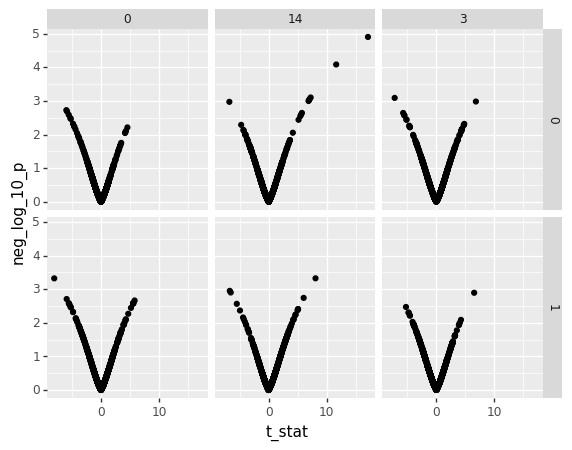

<ggplot: (-9223372036547513684)>

In [15]:
gg.ggplot(all_results_df, gg.aes(x="t_stat", y="neg_log_10_p")) + \
    gg.facet_grid("FFA~diff_day") + \
    gg.geom_point()